In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\david\\Desktop\\mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.shape

(8124, 23)

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
#unique for object data type
for col in data.columns:
    print(col, " : ", data[col].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

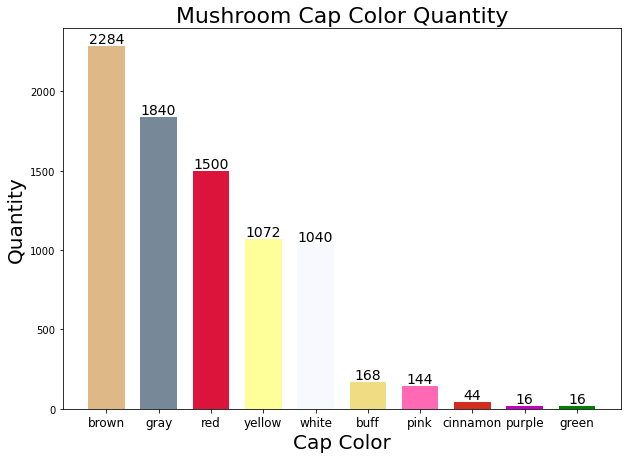

In [10]:
cap_colors = data['cap-color'].value_counts()
m_height = cap_colors.values.tolist()
cap_colors.axes
cap_color_labels = cap_colors.axes[0].tolist()

ind = np.arange(10)
width = 0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize = 12)

def autolabel(rects,fontsize=14):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height), ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show()

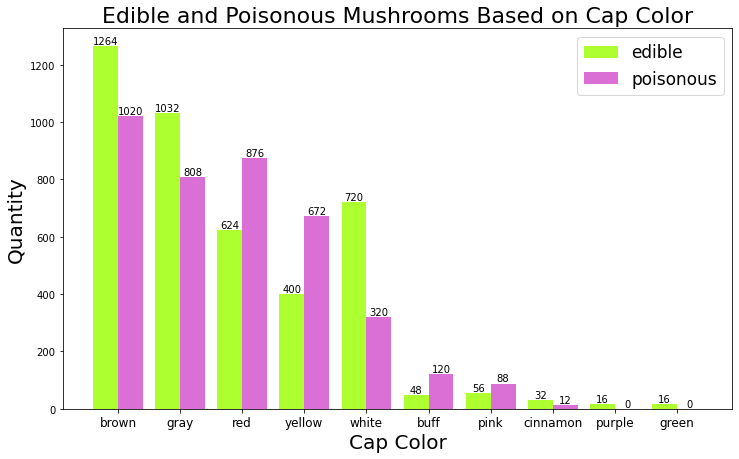

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [11]:
poisonous_cc = []
edible_cc = []
for capColor in cap_color_labels:
    size = len(data[data['cap-color'] == capColor].index)
    edibles = len(data[(data['cap-color'] == capColor) & (data['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DA70D6')

ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'), fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

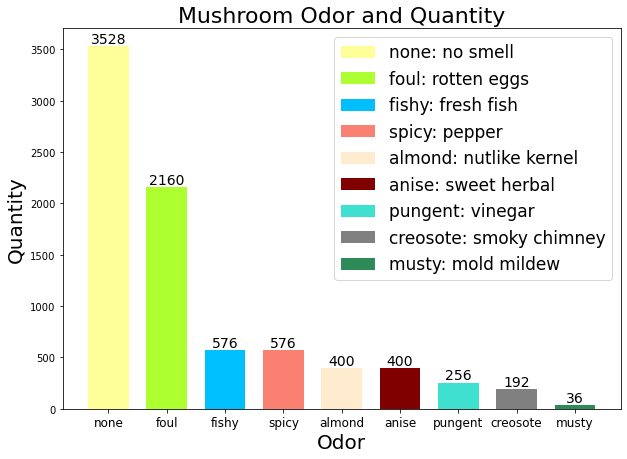

In [12]:
odors = data['odor'].value_counts()
odor_height = odors.values.tolist()
odor_labels = odors.axes[0].tolist()

width = 0.7 
ind = np.arange(9)
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show()

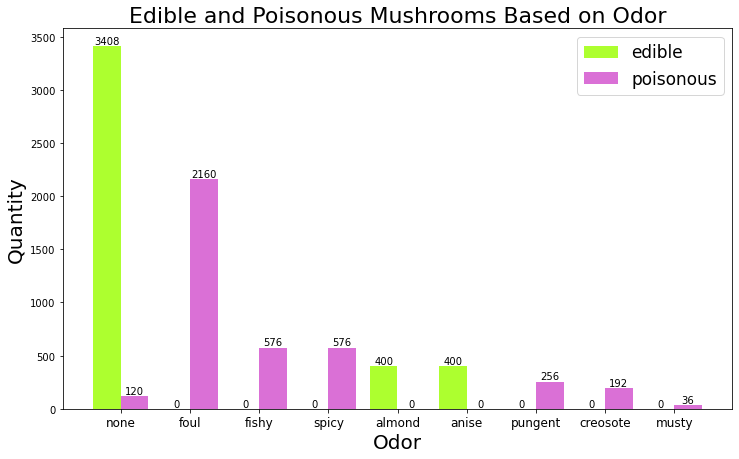

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [13]:
poisonous_od = []
edible_od = []
for odor in odor_labels:
    size = len(data[data['odor'] == odor].index)
    edibles = len(data[(data['odor'] == odor) & (data['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#ADFF2F')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DA70D6')

ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

[4040, 1712, 1248, 400, 384, 340]


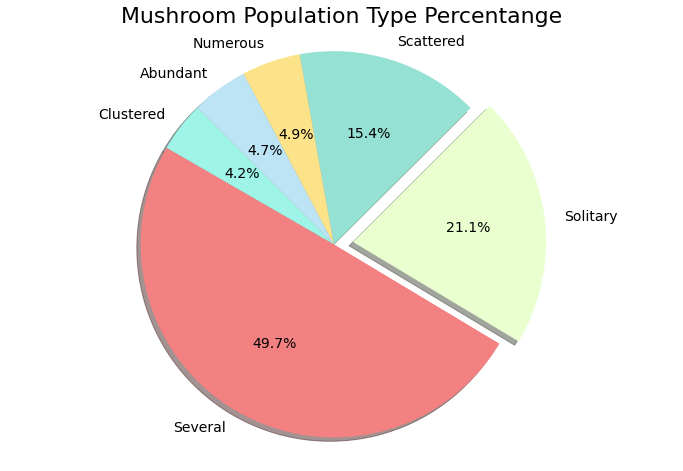

In [14]:
populations = data['population'].value_counts()
pop_size = populations.values.tolist()
pop_types = populations.axes[0].tolist()
print(pop_size)
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [15]:
def label_encoding(c): 
    label_end = preprocessing.LabelEncoder()
    data[c] = label_end.fit_transform(data[c])
    data[c].unique()
for col in data.columns:
    label_encoding(col)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


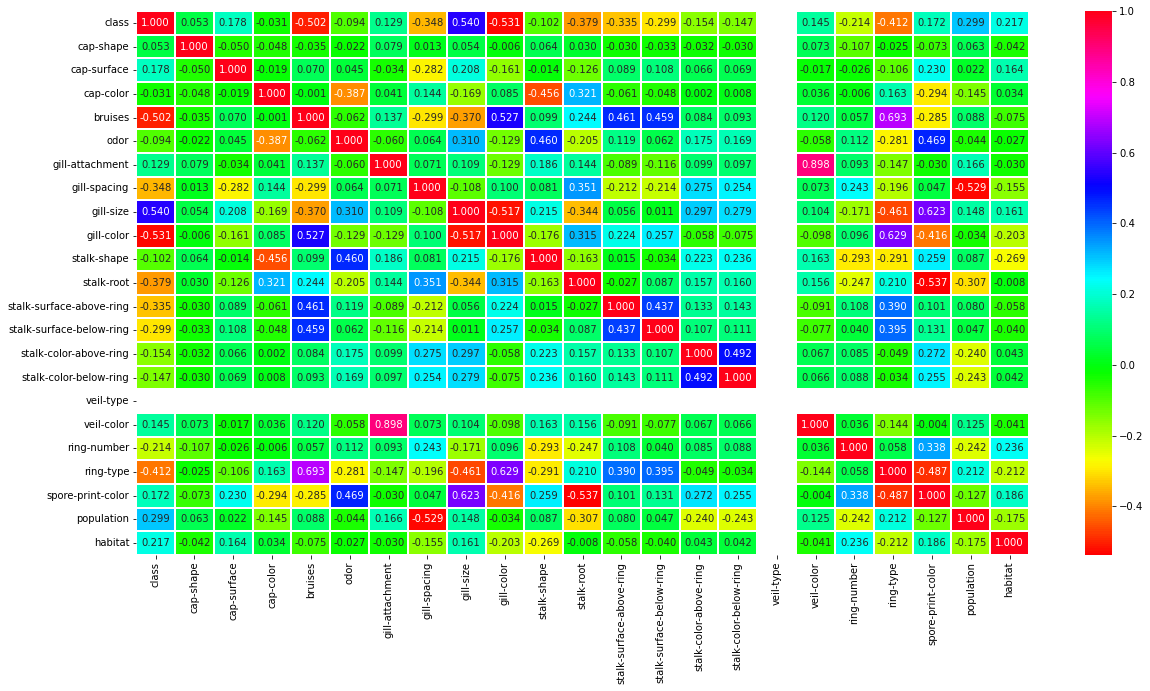

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [17]:
data.groupby('class').mean()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


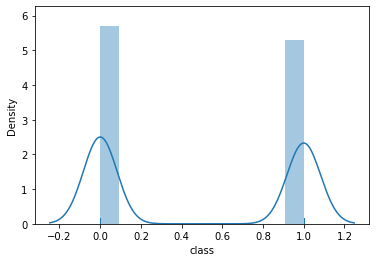

In [18]:
sns.distplot(data['class'], rug=True)
plt.show()

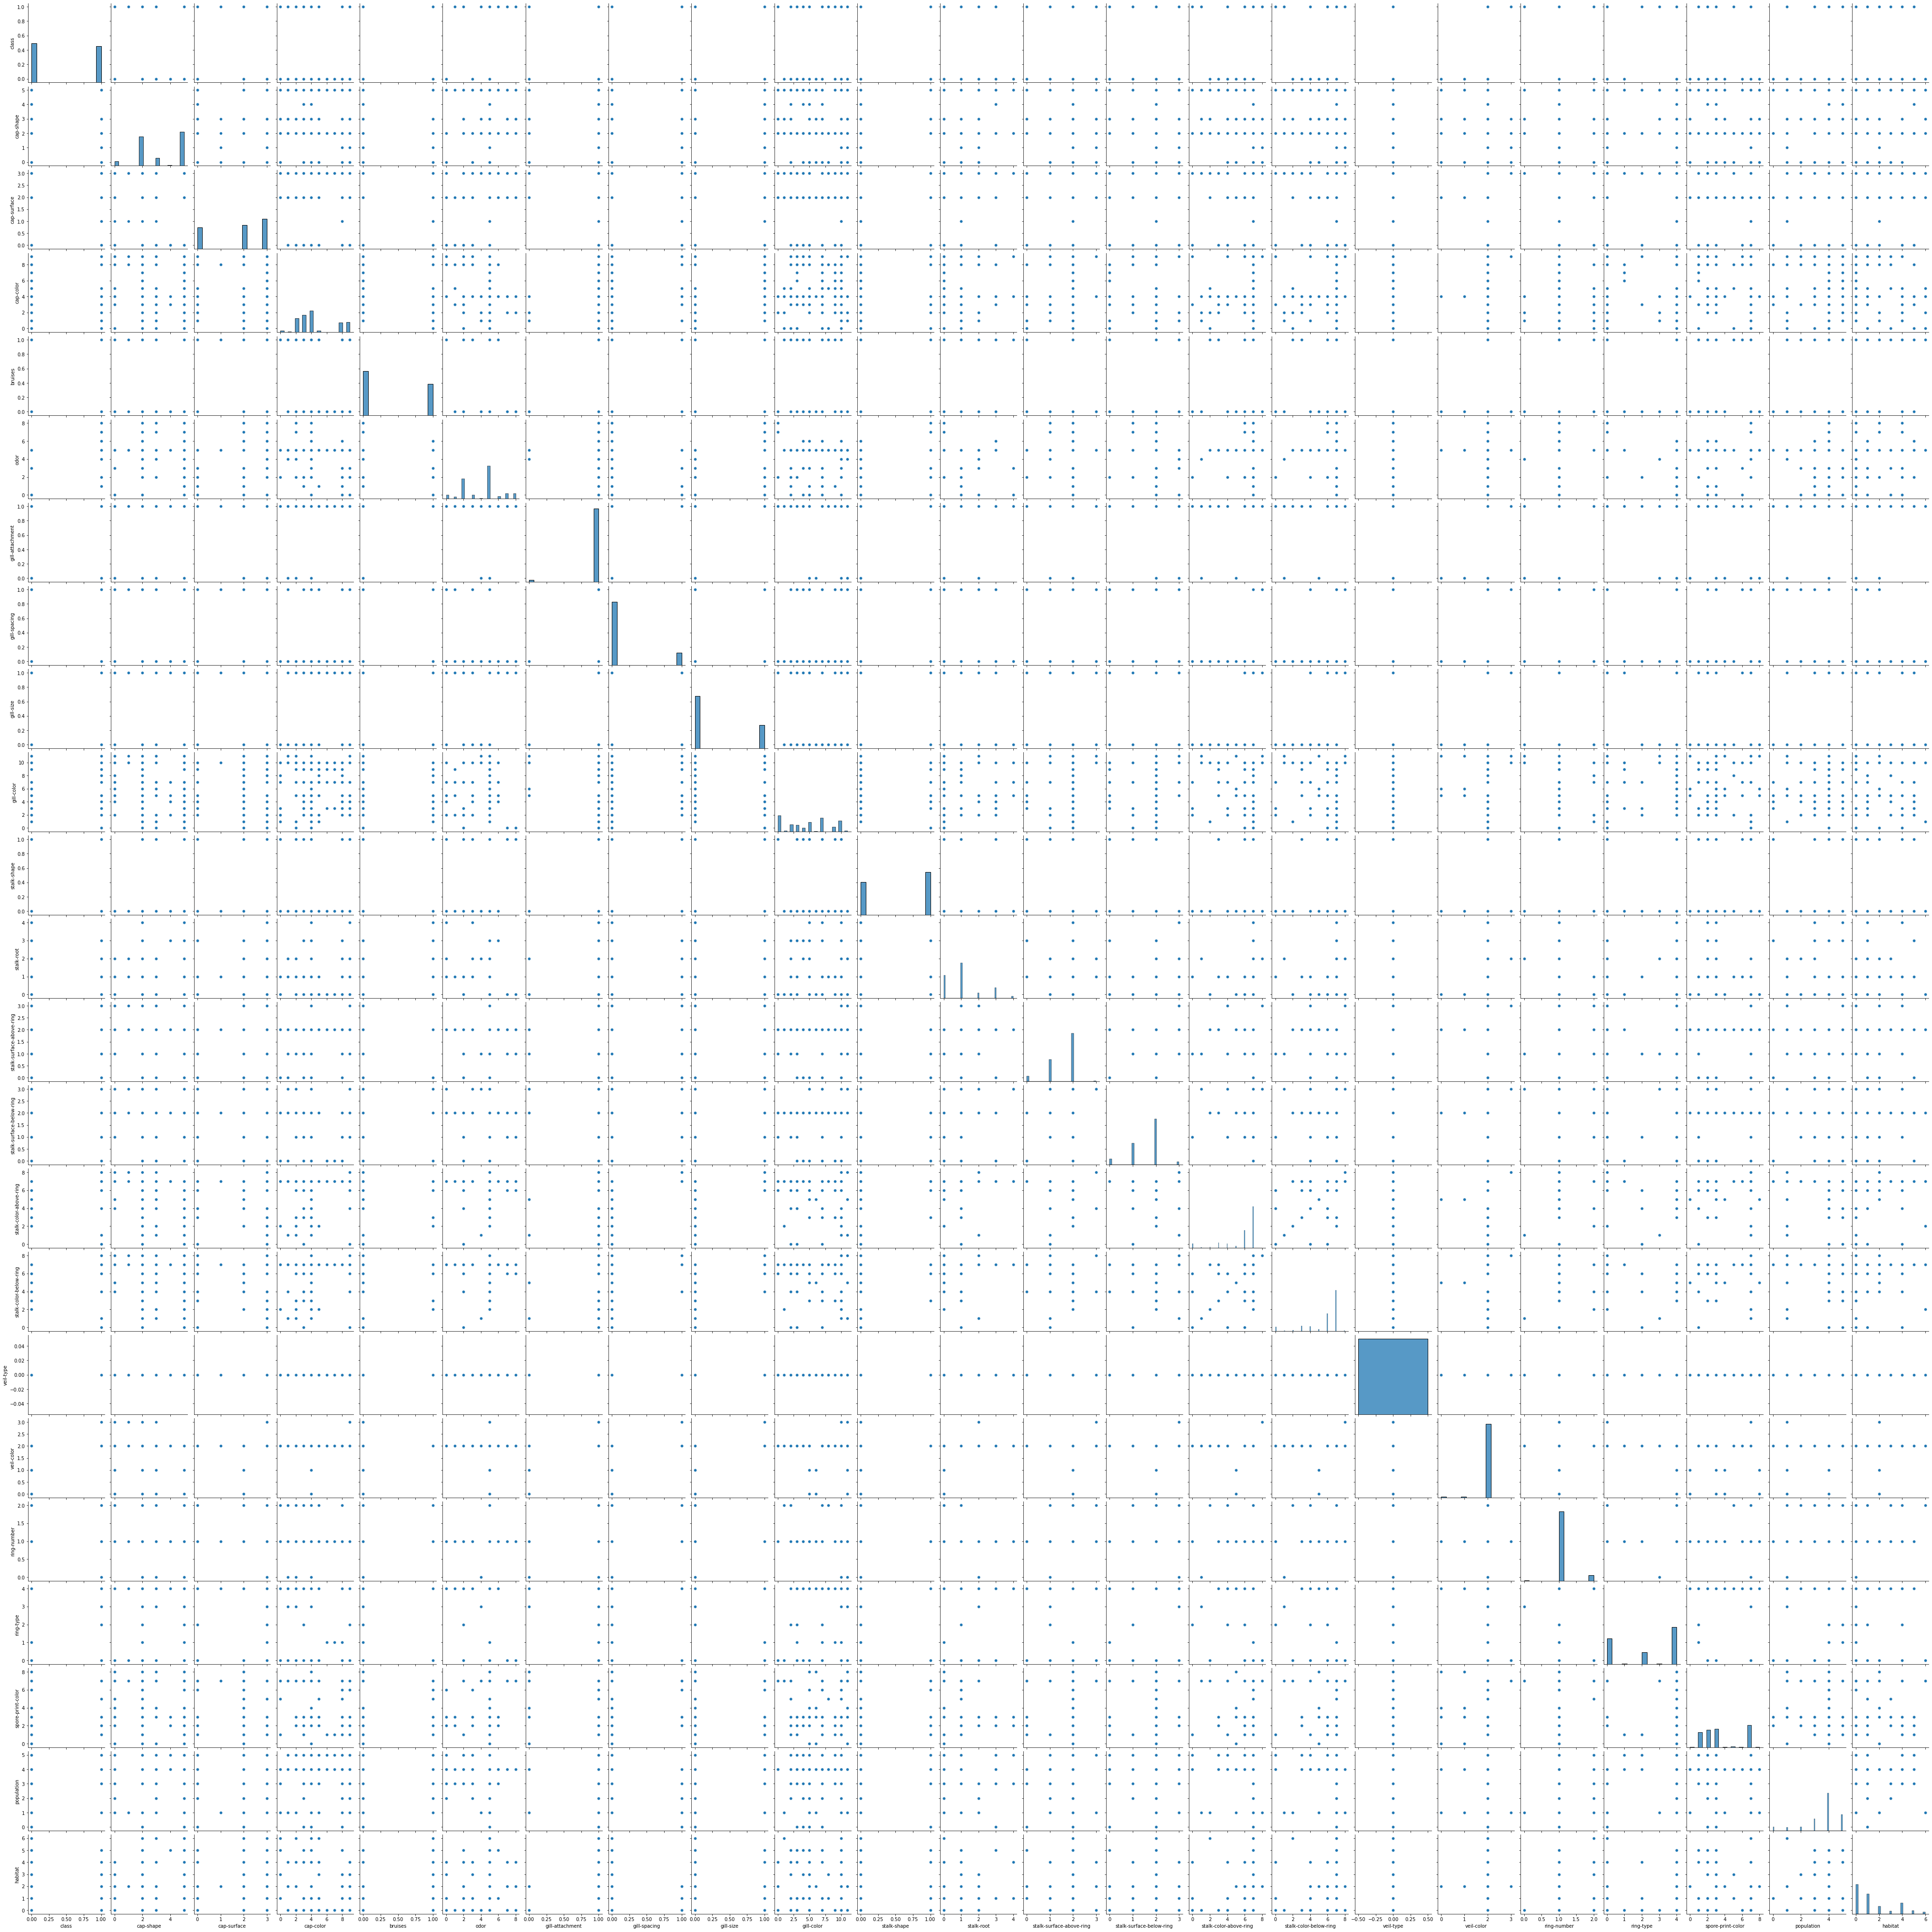

In [19]:
sns.pairplot(data=data)

In [20]:
data['veil-type'].unique().sum()

0

In [21]:
data = data.drop('veil-type',axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['class'], axis=1), # drop the target
    data['class'], # just the target
    test_size=0.3,
    random_state=0)
X_train_save = X_train
X_test_save = X_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 21), (2438, 21), (5686,), (2438,))

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense

In [24]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))

# Adding the second hidden layer
classifier.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
569/569 [==============================] - 1s 1ms/step - loss: 0.3937 - accuracy: 0.8380
Epoch 2/100
569/569 [==============================] - 1s 912us/step - loss: 0.2283 - accuracy: 0.9205
Epoch 3/100
569/569 [==============================] - 1s 949us/step - loss: 0.2024 - accuracy: 0.9339
Epoch 4/100
569/569 [==============================] - 1s 930us/step - loss: 0.1764 - accuracy: 0.9399
Epoch 5/100
569/569 [==============================] - 1s 893us/step - loss: 0.1530 - accuracy: 0.9469
Epoch 6/100
569/569 [==============================] - 1s 954us/step - loss: 0.1271 - accuracy: 0.9550
Epoch 7/100
569/569 [==============================] - 1s 999us/step - loss: 0.0986 - accuracy: 0.9683
Epoch 8/100
569/569 [==============================] - 1s 990us/step - loss: 0.0781 - accuracy: 0.9734
Epoch 9/100
569/569 [==============================] - 1s 925us/step - loss: 0.0602 - accuracy: 0.9828
Epoch 10/100
569/569 [==============================] - 0s 865us/step - los

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy of the model:  1.0


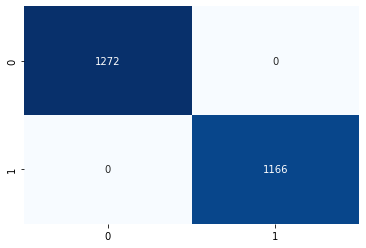

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

RandomForest_accuracy: 1.0


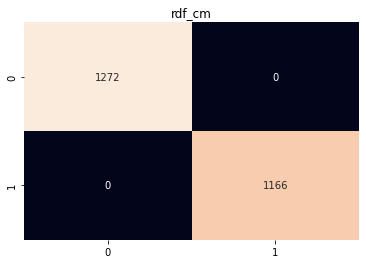

In [28]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

In [29]:
# calculate the chi2 p_value between each of the variables
# and the target

# chi2 returns 2 arrays, one contains the F-Scores which are then
# evaluated against the chi2 distribution to obtain the pvalue.
# The pvalues are in the second array

f_score = chi2(X_train.fillna(0), y_train)

# the 2 arrays of values
f_score

(array([1.55161158e+01, 1.56240230e+02, 7.94381304e+00, 8.25977602e+02,
        5.54086235e+01, 1.96901488e+00, 5.90589878e+02, 1.15889249e+03,
        4.23015943e+03, 2.92378144e+01, 8.16023129e+02, 1.44950491e+02,
        1.34455184e+02, 8.59890935e+01, 7.34557333e+01, 3.00150572e+00,
        1.94345251e+01, 1.29319357e+03, 2.64882225e+02, 2.23545007e+02,
        4.89781773e+02]),
 array([8.18048422e-005, 7.50191590e-036, 4.82520560e-003, 1.21387621e-181,
        9.79059951e-014, 1.60552466e-001, 1.86467098e-130, 5.23886241e-254,
        0.00000000e+000, 6.40175615e-008, 1.77168759e-179, 2.20183591e-033,
        4.34417202e-031, 1.80930772e-020, 1.02918615e-017, 8.31871712e-002,
        1.04107942e-005, 3.40687572e-283, 1.48028355e-059, 1.52459548e-050,
        1.58962910e-108]))

In [30]:
# 1) let's capture the p_values (in the second array, remember python indexes at 0) in a pandas Series
# 2) add the variable names in the index
# 3) order the variables based on their fscore

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

gill-color                   0.000000e+00
ring-type                   3.406876e-283
gill-size                   5.238862e-254
bruises                     1.213876e-181
stalk-root                  1.771688e-179
gill-spacing                1.864671e-130
habitat                     1.589629e-108
spore-print-color            1.480284e-59
population                   1.524595e-50
cap-surface                  7.501916e-36
stalk-surface-above-ring     2.201836e-33
stalk-surface-below-ring     4.344172e-31
stalk-color-above-ring       1.809308e-20
stalk-color-below-ring       1.029186e-17
odor                         9.790600e-14
stalk-shape                  6.401756e-08
ring-number                  1.041079e-05
cap-shape                    8.180484e-05
cap-color                    4.825206e-03
veil-color                   8.318717e-02
gill-attachment              1.605525e-01
dtype: float64

In [31]:
sel_ = SelectKBest(chi2, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [32]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [33]:
X_train.shape,X_test.shape

((5686, 10), (2438, 10))

In [34]:
classifier2 = Sequential()

# Adding the input layer and the first hidden layer
classifier2.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the second hidden layer
classifier2.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
classifier2.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
569/569 [==============================] - 0s 863us/step - loss: 0.4654 - accuracy: 0.8009
Epoch 2/100
569/569 [==============================] - 0s 854us/step - loss: 0.3004 - accuracy: 0.9033
Epoch 3/100
569/569 [==============================] - 0s 820us/step - loss: 0.2819 - accuracy: 0.9187
Epoch 4/100
569/569 [==============================] - 1s 929us/step - loss: 0.2697 - accuracy: 0.9260
Epoch 5/100
569/569 [==============================] - 1s 919us/step - loss: 0.2555 - accuracy: 0.9325
Epoch 6/100
569/569 [==============================] - 1s 936us/step - loss: 0.2424 - accuracy: 0.9379
Epoch 7/100
569/569 [==============================] - 1s 926us/step - loss: 0.2310 - accuracy: 0.9397
Epoch 8/100
569/569 [==============================] - 1s 938us/step - loss: 0.2198 - accuracy: 0.9404
Epoch 9/100
569/569 [==============================] - 1s 934us/step - loss: 0.2095 - accuracy: 0.9411
Epoch 10/100
569/569 [==============================] - 1s 954us/step - l

In [36]:
# Predicting the Test set results
y_pred = classifier2.predict(X_test)

accuracy of the model:  0.9942575881870386


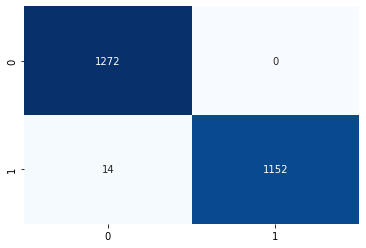

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

RandomForest_accuracy: 1.0


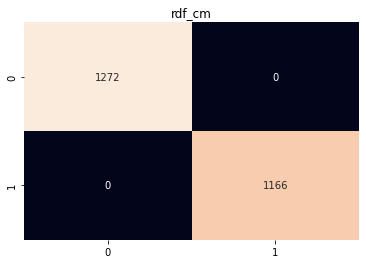

In [38]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

In [39]:
sel_ = SelectKBest(chi2, k=10).fit(X_train_save, y_train)

# display features
X_train_save.columns[sel_.get_support()]

Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [40]:
# to remove the rest of the features:

X_train = sel_.transform(X_train_save)
X_test = sel_.transform(X_test_save)

In [41]:
X_train.shape,X_test.shape

((5686, 10), (2438, 10))

In [42]:
classifier3 = Sequential()

# Adding the input layer and the first hidden layer
classifier3.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

# Adding the output layer
classifier3.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
classifier3.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
569/569 [==============================] - 1s 883us/step - loss: 0.4869 - accuracy: 0.7875
Epoch 2/100
569/569 [==============================] - 1s 956us/step - loss: 0.3238 - accuracy: 0.8855
Epoch 3/100
569/569 [==============================] - 1s 900us/step - loss: 0.2916 - accuracy: 0.9087
Epoch 4/100
569/569 [==============================] - 1s 913us/step - loss: 0.2779 - accuracy: 0.9142
Epoch 5/100
569/569 [==============================] - 1s 900us/step - loss: 0.2670 - accuracy: 0.9205
Epoch 6/100
569/569 [==============================] - 1s 907us/step - loss: 0.2592 - accuracy: 0.9242
Epoch 7/100
569/569 [==============================] - 1s 896us/step - loss: 0.2534 - accuracy: 0.9295
Epoch 8/100
569/569 [==============================] - 1s 897us/step - loss: 0.2476 - accuracy: 0.9316
Epoch 9/100
569/569 [==============================] - 1s 901us/step - loss: 0.2406 - accuracy: 0.9319
Epoch 10/100
569/569 [==============================] - 1s 885us/step - l

In [44]:
sel_ = SelectKBest(chi2, k=5).fit(X_train_save, y_train)

# display features
X_train_save.columns[sel_.get_support()]

X_train = sel_.transform(X_train_save)
X_test = sel_.transform(X_test_save)

In [45]:
classifier4 = Sequential()

# Adding the input layer and the first hidden layer
classifier4.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))

# Adding the second layer
classifier4.add(Dense(3, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier4.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
classifier4.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
569/569 [==============================] - 1s 952us/step - loss: 0.6398 - accuracy: 0.6476
Epoch 2/100
569/569 [==============================] - 1s 968us/step - loss: 0.5700 - accuracy: 0.7321
Epoch 3/100
569/569 [==============================] - 1s 916us/step - loss: 0.5236 - accuracy: 0.8058
Epoch 4/100
569/569 [==============================] - 1s 953us/step - loss: 0.4872 - accuracy: 0.8050
Epoch 5/100
569/569 [==============================] - 1s 919us/step - loss: 0.4623 - accuracy: 0.7992
Epoch 6/100
569/569 [==============================] - 1s 951us/step - loss: 0.4473 - accuracy: 0.8083
Epoch 7/100
569/569 [==============================] - 1s 950us/step - loss: 0.4347 - accuracy: 0.8043
Epoch 8/100
569/569 [==============================] - 1s 920us/step - loss: 0.4083 - accuracy: 0.8433
Epoch 9/100
569/569 [==============================] - 1s 948us/step - loss: 0.3753 - accuracy: 0.8667
Epoch 10/100
569/569 [==============================] - 1s 935us/step - l

In [47]:
# Predicting the Test set results
y_pred = classifier4.predict(X_test)

accuracy of the model:  0.9331419196062346


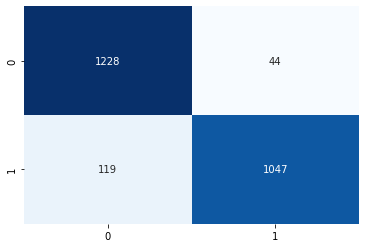

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

RandomForest_accuracy: 0.9700574241181296


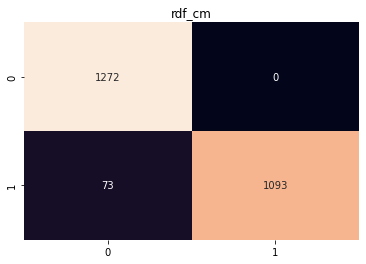

In [49]:
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

### Attribute Information: (classes: edible=e, poisonous=p)

#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

#### bruises: bruises=t,no=f

#### gill-spacing: close=c,crowded=w,distant=d

#### gill-size: broad=b,narrow=n

#### stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

#### population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

#### habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [50]:
sel_ = SelectKBest(chi2, k=10).fit(X_train_save, y_train)

# display features
X_train_save.columns[sel_.get_support()]

X_train = sel_.transform(X_train_save)
X_test = sel_.transform(X_test_save)

In [51]:
classifier5 = Sequential()

# Adding the input layer and the first hidden layer
classifier5.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

#Second hidden layer
classifier5.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

#Third hidden layer
classifier5.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

#Third forth layer
classifier5.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier5.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
classifier5.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
569/569 [==============================] - 1s 1ms/step - loss: 0.4825 - accuracy: 0.7682
Epoch 2/100
569/569 [==============================] - 1s 1ms/step - loss: 0.2518 - accuracy: 0.9353
Epoch 3/100
569/569 [==============================] - 1s 1ms/step - loss: 0.2308 - accuracy: 0.9393
Epoch 4/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1996 - accuracy: 0.9406
Epoch 5/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1734 - accuracy: 0.9404
Epoch 6/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1574 - accuracy: 0.9455
Epoch 7/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1458 - accuracy: 0.9502
Epoch 8/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1345 - accuracy: 0.9645
Epoch 9/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1229 - accuracy: 0.9705
Epoch 10/100
569/569 [==============================] - 1s 1ms/step - loss: 0.1113 - accura

accuracy of the model:  0.9963084495488105


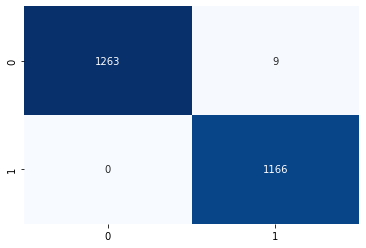

In [53]:
# Predicting the Test set results
y_pred = classifier5.predict(X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

In [54]:
import math
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [55]:
brojac = 1

In [59]:
modnum = 1
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func):
    global modnum
    print(str(modnum) + ". model\n")
    modnum = modnum + 1
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer='adam', loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


##Wrap model into scikit-learn
model =  KerasClassifier(build_fn=createmodel, verbose = False)  

In [60]:
activation_funcs = ['sigmoid', 'relu', 'tanh'] 
loss_funcs = ['binary_crossentropy','hinge']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [48,24,12,6], last_layer_nodes = [4],  activation_func = activation_funcs, loss_func = loss_funcs, batch_size = [100,50,10], epochs = [20,60,100])
grid = GridSearchCV(estimator = model, param_grid = param_grid)

In [61]:
grid.fit(X_train,y_train)

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model

model


GridSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002693A7583A0>,
             param_grid={'activation_func': ['sigmoid', 'relu', 'tanh'],
                         'batch_size': [100, 50, 10], 'epochs': [20, 60, 100],
                         'first_layer_nodes': [48, 24, 12, 6],
                         'last_layer_nodes': [4],
                         'loss_func': ['binary_crossentropy', 'hinge'],
                         'n_layers': [2, 3]})

In [62]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'activation_func': 'sigmoid', 'batch_size': 10, 'epochs': 60, 'first_layer_nodes': 48, 'last_layer_nodes': 4, 'loss_func': 'binary_crossentropy', 'n_layers': 3}


In [63]:
classifier6 = createmodel(3, 48, 4, 'sigmoid', 'binary_crossentropy')

model



In [64]:
classifier6.fit(X_train, y_train, batch_size = 10, epochs = 60)

Epoch 1/60
569/569 [==============================] - 1s 1ms/step - loss: 0.4505 - accuracy: 0.8074
Epoch 2/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.9056
Epoch 3/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2347 - accuracy: 0.9309: 0s - loss: 0.2375 - accuracy: 0.
Epoch 4/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2063 - accuracy: 0.9377
Epoch 5/60
569/569 [==============================] - 1s 1ms/step - loss: 0.1840 - accuracy: 0.9472
Epoch 6/60
569/569 [==============================] - 1s 1ms/step - loss: 0.1661 - accuracy: 0.9492
Epoch 7/60
569/569 [==============================] - 1s 953us/step - loss: 0.1506 - accuracy: 0.9587
Epoch 8/60
569/569 [==============================] - 1s 899us/step - loss: 0.1379 - accuracy: 0.9608
Epoch 9/60
569/569 [==============================] - 1s 1ms/step - loss: 0.1291 - accuracy: 0.9622
Epoch 10/60
569/569 [==============================] - 1s 1ms/

In [65]:
# Predicting the Test set results
y_pred = classifier6.predict(X_test)
#y_pred = np.hstack(y_pred.round())
#y_pred = list(map(lambda x: 0 if x <= 0 else 1, y_pred))

#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

accuracy of the model:  1.0


<AxesSubplot:>

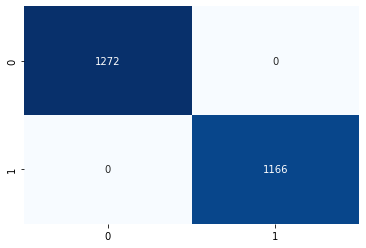

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [76]:
from math import e
def myActivationFunction(x):
    return 1 / (1 + e ** (- 10 * x))
def myActivationFunction2(x):
    return 1 / (1 + e ** (- 0.4 * x))

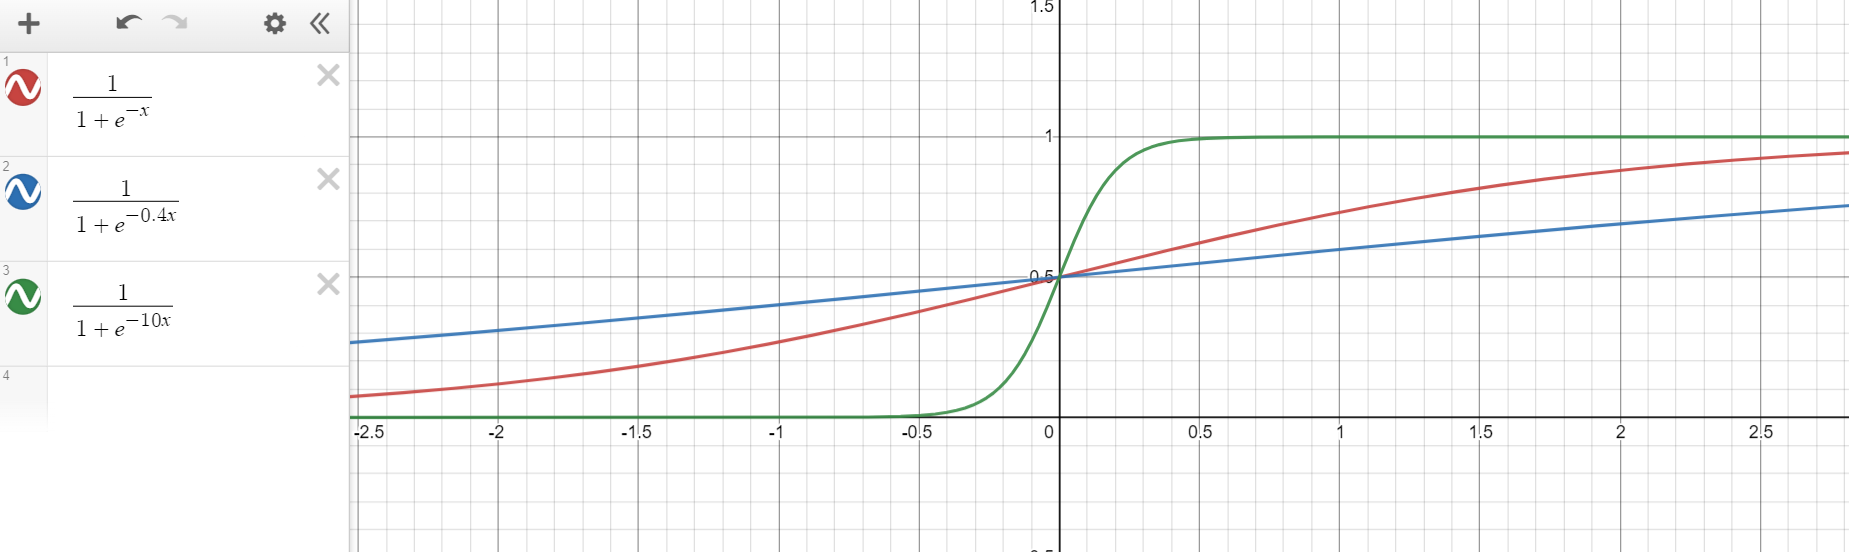

In [77]:
classifier7 = createmodel(3, 48, 4, myActivationFunction2, 'binary_crossentropy')

model



In [78]:
classifier7.fit(X_train, y_train, batch_size = 10, epochs = 60)

Epoch 1/60
569/569 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.7086
Epoch 2/60
569/569 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8389
Epoch 3/60
569/569 [==============================] - 1s 1ms/step - loss: 0.3273 - accuracy: 0.8785
Epoch 4/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2923 - accuracy: 0.9013
Epoch 5/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2729 - accuracy: 0.9180
Epoch 6/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2590 - accuracy: 0.9244
Epoch 7/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2499 - accuracy: 0.9309
Epoch 8/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2433 - accuracy: 0.9348
Epoch 9/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2390 - accuracy: 0.9360
Epoch 10/60
569/569 [==============================] - 1s 1ms/step - loss: 0.2344 - accuracy: 0.9384

accuracy of the model:  0.9749794913863823


<AxesSubplot:>

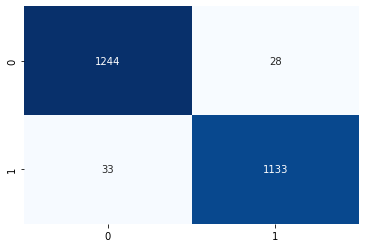

In [79]:
# Predicting the Test set results
y_pred = classifier7.predict(X_test)

#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [73]:
classifier8 = createmodel(3, 48, 4, myActivationFunction, 'binary_crossentropy')

model



In [74]:
classifier8.fit(X_train, y_train, batch_size = 10, epochs = 60)

Epoch 1/60
569/569 [==============================] - 1s 1ms/step - loss: 0.3406 - accuracy: 0.8906
Epoch 2/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0678 - accuracy: 0.9801
Epoch 3/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 4/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0172 - accuracy: 0.9960
Epoch 5/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0092 - accuracy: 0.9979
Epoch 6/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0170 - accuracy: 0.9951
Epoch 7/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.9984
Epoch 8/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0045 - accuracy: 0.9989 ETA: 0s - loss: 0.0023 - accuracy - ETA: 0s - loss: 0.0056 - 
Epoch 9/60
569/569 [==============================] - 1s 1ms/step - loss: 0.0018 - accuracy: 0.9996: 0s - loss: 0.0015 
Epoch 10/60
569/56

accuracy of the model:  1.0


<AxesSubplot:>

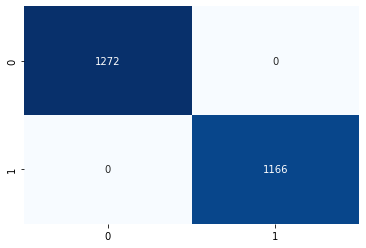

In [75]:
# Predicting the Test set results
y_pred = classifier8.predict(X_test)

#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [95]:
modelnum = 1
def createmodelwithlearningrate(n_layers, first_layer_nodes, last_layer_nodes, activation_func, loss_func, opt):
    global modelnum
    print(str(modelnum) + ". model\n")
    modelnum = modelnum + 1
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    #Finally, the output layer should have a single node in binary classification
    model.add(Dense(1, activation=activation_func))
    model.compile(optimizer=opt, loss=loss_func, metrics = ["accuracy"]) #note: metrics could also be 'mse'
    
    return model

# fit a model and plot learning curve
from keras.optimizers import SGD

# snippet of using the ReduceLROnPlateau callback
from keras.callbacks import ReduceLROnPlateau

def fit_model(trainX, trainy, testX, testy, lrate):
    # define and compile model
    opt = SGD(lr=lrate)
    model = createmodelwithlearningrate(3, 48, 4, myActivationFunction, 'binary_crossentropy', opt)    
    rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
    # fit model
    history = model.fit(trainX, trainy, validation_data=(testX, testy), batch_size = 10, epochs=60, callbacks=[rlrop])
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lrate='+str(lrate), pad=-50)

1. model

Epoch 1/60
569/569 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5160 - val_loss: nan - val_accuracy: 0.5217
Epoch 2/60
569/569 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.5164 - val_loss: nan - val_accuracy: 0.5217
Epoch 3/60
569/569 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.5164 - val_loss: nan - val_accuracy: 0.5217
Epoch 4/60
569/569 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5164 - val_loss: nan - val_accuracy: 0.5217
Epoch 5/60
569/569 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.5164 - val_loss: nan - val_accuracy: 0.5217
Epoch 6/60
569/569 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.5164 - val_loss: nan - val_accuracy: 0.5217
Epoch 7/60
569/569 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.5164 - val_loss: nan - val_accuracy: 0.5217
Epoch 8/60
569/569 [==================

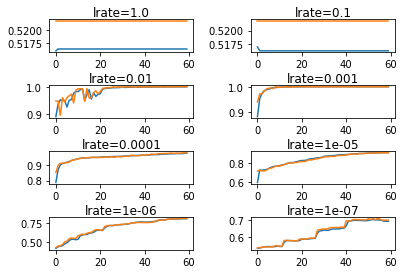

In [96]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i])
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)
# show learning curves
plt.show()

<Figure size 432x288 with 0 Axes>